In [97]:
!pip install pandas

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


In [99]:
base_princ = pd.read_csv('state_of_data_2023.csv')

In [100]:

novo_nome_colunas = {
    "('P1_a ', 'Idade')": 'Idade',
    "('P1_b ', 'Genero')": 'Genero',
    "('P1_c ', 'Cor/raca/etnia')": 'Cor/raca/etnia',
    "('P1_d ', 'PCD')": 'PCD',
    "('P1_i_1 ', 'uf onde mora')": 'UF',
    "('P1_i_2 ', 'Regiao onde mora')": 'Regiao onde mora',
    "('P1_l ', 'Nivel de Ensino')": 'Nível de Ensino',
    "('P1_m ', 'Área de Formação')": 'Área de formação',
    "('P2_a ', 'Qual sua situação atual de trabalho?')": 'Situação de trabalho'
}

base_princ.columns = [novo_nome_colunas.get(col, col) for col in base_princ.columns]
print(base_princ.columns)

Index(['('P0', 'id')', 'Idade', '('P1_a_1 ', 'Faixa idade')', 'Genero',
       'Cor/raca/etnia', 'PCD',
       '('P1_e ', 'experiencia_profissional_prejudicada')',
       '('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')',
       '('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')',
       '('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')',
       ...
       '('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')',
       '('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')',
       '('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')',
       '('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')',
      

In [101]:
colunas = [
    "Idade",
    "Genero",
    "Cor/raca/etnia",
    "PCD",
    "UF",
    "Regiao onde mora",
    "Nível de Ensino",
    "Área de formação",
    "Situação de trabalho"
]
base_princ = base_princ[colunas]
base_princ.columns.tolist()

['Idade',
 'Genero',
 'Cor/raca/etnia',
 'PCD',
 'UF',
 'Regiao onde mora',
 'Nível de Ensino',
 'Área de formação',
 'Situação de trabalho']

In [102]:
base_princ.head()

,Idade,Genero,Cor/raca/etnia,PCD,UF,Regiao onde mora,Nível de Ensino,Área de formação,Situação de trabalho
0,31,Masculino,Branca,Não,MG,Sudeste,Doutorado ou Phd,Computação / Engenharia de Software / Sistemas...,Empregado (CLT)
1,30,Masculino,Branca,Não,ES,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ)
2,37,Feminino,Amarela,Não,SP,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empregado (CLT)
3,22,Masculino,Preta,Não,SP,Sudeste,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,"Desempregado, buscando recolocação"
4,34,Masculino,Branca,Não,MG,Sudeste,Doutorado ou Phd,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ)


In [103]:
base_princ

,Idade,Genero,Cor/raca/etnia,PCD,UF,Regiao onde mora,Nível de Ensino,Área de formação,Situação de trabalho
0,31,Masculino,Branca,Não,MG,Sudeste,Doutorado ou Phd,Computação / Engenharia de Software / Sistemas...,Empregado (CLT)
1,30,Masculino,Branca,Não,ES,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ)
2,37,Feminino,Amarela,Não,SP,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empregado (CLT)
3,22,Masculino,Preta,Não,SP,Sudeste,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,"Desempregado, buscando recolocação"
4,34,Masculino,Branca,Não,MG,Sudeste,Doutorado ou Phd,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ)
...,...,...,...,...,...,...,...,...,...
5288,34,Masculino,Preta,Não,MG,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ)
5289,32,Masculino,Branca,Não,RN,Nordeste,Graduação/Bacharelado,Outras Engenharias,Empregado (CLT)
5290,25,Masculino,Branca,Não,SP,Sudeste,Graduação/Bacharelado,Marketing / Publicidade / Comunicação / Jornal...,Empregado (CLT)
5291,31,Masculino,Parda,Não,SP,Sudeste,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,"Desempregado, buscando recolocação"


In [104]:
base_princ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 5293 non-null   int64 
 1   Genero                5293 non-null   object
 2   Cor/raca/etnia        5293 non-null   object
 3   PCD                   5293 non-null   object
 4   UF                    5169 non-null   object
 5   Regiao onde mora      5169 non-null   object
 6   Nível de Ensino       5293 non-null   object
 7   Área de formação      5180 non-null   object
 8   Situação de trabalho  5293 non-null   object
dtypes: int64(1), object(8)
memory usage: 372.3+ KB


In [105]:
for col in base_princ.columns:
    nulos = base_princ[col].isnull().sum()
    print(f'numero de valores nulos na coluna {col} é: {nulos}')

numero de valores nulos na coluna Idade é: 0
numero de valores nulos na coluna Genero é: 0
numero de valores nulos na coluna Cor/raca/etnia é: 0
numero de valores nulos na coluna PCD é: 0
numero de valores nulos na coluna UF é: 124
numero de valores nulos na coluna Regiao onde mora é: 124
numero de valores nulos na coluna Nível de Ensino é: 0
numero de valores nulos na coluna Área de formação é: 113
numero de valores nulos na coluna Situação de trabalho é: 0


In [106]:
# prompt: remover valores nulos da coluna UF

base_princ = base_princ.dropna(subset=['UF'])

for col in base_princ.columns:
    nulos = base_princ[col].isnull().sum()
    print(f'numero de valores nulos na coluna {col} é: {nulos}')

numero de valores nulos na coluna Idade é: 0
numero de valores nulos na coluna Genero é: 0
numero de valores nulos na coluna Cor/raca/etnia é: 0
numero de valores nulos na coluna PCD é: 0
numero de valores nulos na coluna UF é: 0
numero de valores nulos na coluna Regiao onde mora é: 0
numero de valores nulos na coluna Nível de Ensino é: 0
numero de valores nulos na coluna Área de formação é: 107
numero de valores nulos na coluna Situação de trabalho é: 0


In [107]:
for col in base_princ.columns:
    mode_value = base_princ[col].mode()
    print(f'A moda da coluna {col} é: {mode_value.iloc[0]}')


A moda da coluna Idade é: 27
A moda da coluna Genero é: Masculino
A moda da coluna Cor/raca/etnia é: Branca
A moda da coluna PCD é: Não
A moda da coluna UF é: SP
A moda da coluna Regiao onde mora é: Sudeste
A moda da coluna Nível de Ensino é: Pós-graduação
A moda da coluna Área de formação é: Computação / Engenharia de Software / Sistemas de Informação/ TI
A moda da coluna Situação de trabalho é: Empregado (CLT)


In [108]:
base_princ.fillna(value='Computação / Engenharia de Software / Sistemas de Informação/ TI', inplace=True)

for col in base_princ.columns:
    nulos = base_princ[col].isnull().sum()
    print(f'numero de valores nulos na coluna {col} é: {nulos}')

numero de valores nulos na coluna Idade é: 0
numero de valores nulos na coluna Genero é: 0
numero de valores nulos na coluna Cor/raca/etnia é: 0
numero de valores nulos na coluna PCD é: 0
numero de valores nulos na coluna UF é: 0
numero de valores nulos na coluna Regiao onde mora é: 0
numero de valores nulos na coluna Nível de Ensino é: 0
numero de valores nulos na coluna Área de formação é: 0
numero de valores nulos na coluna Situação de trabalho é: 0


<ipython-input-108-26e956abe831>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_princ.fillna(value='Computação / Engenharia de Software / Sistemas de Informação/ TI', inplace=True)


In [109]:
#Cortei o "Outro", por não identificar se era Homem ou Mulher
index_to_drop = base_princ[base_princ['Genero'] == 'Outro'].index


In [110]:
base_princ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5292
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 5169 non-null   int64 
 1   Genero                5169 non-null   object
 2   Cor/raca/etnia        5169 non-null   object
 3   PCD                   5169 non-null   object
 4   UF                    5169 non-null   object
 5   Regiao onde mora      5169 non-null   object
 6   Nível de Ensino       5169 non-null   object
 7   Área de formação      5169 non-null   object
 8   Situação de trabalho  5169 non-null   object
dtypes: int64(1), object(8)
memory usage: 403.8+ KB


In [111]:
base_princ.loc[base_princ['Genero'] == 'Masculino', 'Genero'] = 0
base_princ.loc[base_princ['Genero'] == 'Feminino', 'Genero'] = 1
# Obtém os índices das linhas onde o gênero é "Outro"
index_to_drop = base_princ[base_princ['Genero'] == 'Outro'].index


In [112]:
# Remove as linhas com esses índices do DataFrame
base_princ = base_princ.drop(index_to_drop)

In [113]:
base_princ['Cor/raca/etnia'] = LabelEncoder().fit_transform(base_princ['Cor/raca/etnia'])
print(base_princ['Cor/raca/etnia'].unique())


[1 0 6 4 5 3 2]


In [114]:
base_princ.loc[base_princ['PCD'] == 'Sim', 'PCD'] = 1
base_princ.loc[base_princ['PCD'] == 'Não', 'PCD'] = 0
# Há "prefiro não informar", porém como não posso inferir se a pessoa é PCD ou não, prefiro remover as linhas.
index_to_drop = base_princ[base_princ['PCD'] == 'Prefiro não informar'].index
base_princ = base_princ.drop(index_to_drop)
print(base_princ['PCD'].unique())

[0 1]


In [115]:
base_princ.loc[base_princ['Regiao onde mora'] == 'Norte', 'Regiao onde mora'] = 0
base_princ.loc[base_princ['Regiao onde mora'] == 'Nordeste', 'Regiao onde mora'] = 1
base_princ.loc[base_princ['Regiao onde mora'] == 'Sudeste', 'Regiao onde mora'] = 2
base_princ.loc[base_princ['Regiao onde mora'] == 'Sul', 'Regiao onde mora'] = 3
base_princ.loc[base_princ['Regiao onde mora'] == 'Centro-Oeste', 'Regiao onde mora'] = 4
print(base_princ['Regiao onde mora'].unique())

[2 1 3 'Centro-oeste' 0]


In [116]:
base_princ.loc[base_princ['UF'] == 'AC', 'UF'] = 0
base_princ.loc[base_princ['UF'] == 'AL', 'UF'] = 1
base_princ.loc[base_princ['UF'] == 'AP', 'UF'] = 2
base_princ.loc[base_princ['UF'] == 'AM', 'UF'] = 3
base_princ.loc[base_princ['UF'] == 'BA', 'UF'] = 4
base_princ.loc[base_princ['UF'] == 'CE', 'UF'] = 5
base_princ.loc[base_princ['UF'] == 'DF', 'UF'] = 6
base_princ.loc[base_princ['UF'] == 'ES', 'UF'] = 7
base_princ.loc[base_princ['UF'] == 'GO', 'UF'] = 8
base_princ.loc[base_princ['UF'] == 'MA', 'UF'] = 9
base_princ.loc[base_princ['UF'] == 'MT', 'UF'] = 10
base_princ.loc[base_princ['UF'] == 'MS', 'UF'] = 11
base_princ.loc[base_princ['UF'] == 'MG', 'UF'] = 12
base_princ.loc[base_princ['UF'] == 'PA', 'UF'] = 13
base_princ.loc[base_princ['UF'] == 'PB', 'UF'] = 14
base_princ.loc[base_princ['UF'] == 'PR', 'UF'] = 15
base_princ.loc[base_princ['UF'] == 'PE', 'UF'] = 16
base_princ.loc[base_princ['UF'] == 'PI', 'UF'] = 17
base_princ.loc[base_princ['UF'] == 'RJ', 'UF'] = 18
base_princ.loc[base_princ['UF'] == 'RN', 'UF'] = 19
base_princ.loc[base_princ['UF'] == 'RS', 'UF'] = 20
base_princ.loc[base_princ['UF'] == 'RO', 'UF'] = 21
base_princ.loc[base_princ['UF'] == 'RR', 'UF'] = 22
base_princ.loc[base_princ['UF'] == 'SC', 'UF'] = 23
base_princ.loc[base_princ['UF'] == 'SP', 'UF'] = 24
base_princ.loc[base_princ['UF'] == 'SE', 'UF'] = 25
base_princ.loc[base_princ['UF'] == 'TO', 'UF'] = 26


In [117]:
base_princ.loc[base_princ['Nível de Ensino'] == 'Não tenho graduação formal',     'Nível de Ensino'] = 0
base_princ.loc[base_princ['Nível de Ensino'] == 'Estudante de Graduação',         'Nível de Ensino'] = 1
base_princ.loc[base_princ['Nível de Ensino'] == 'Graduação/Bacharelado',          'Nível de Ensino'] = 2
base_princ.loc[base_princ['Nível de Ensino'] == 'Pós-graduação',                  'Nível de Ensino'] = 3
base_princ.loc[base_princ['Nível de Ensino'] == 'Mestrado',                       'Nível de Ensino'] = 4
base_princ.loc[base_princ['Nível de Ensino'] == 'Doutorado ou Phd',               'Nível de Ensino'] = 5



print(base_princ['Nível de Ensino'].unique())


[5 2 1 3 4 0 'Prefiro não informar']


In [118]:
mode_value = base_princ['Nível de Ensino'].mode()
print(f'A moda da coluna Nível de Ensino é: {mode_value.iloc[0]}')


A moda da coluna Nível de Ensino é: 3


In [119]:
base_princ.loc[base_princ['Nível de Ensino'] == 'Prefiro não informar',  'Nível de Ensino'] = 3
print(base_princ['Nível de Ensino'].unique())

[5 2 1 3 4 0]


In [120]:
base_princ.loc[base_princ['Área de formação'] == 'Computação / Engenharia de Software / Sistemas de Informação/ TI', 'Área de formação'] = 0
base_princ.loc[base_princ['Área de formação'] == 'Economia/ Administração / Contabilidade / Finanças/ Negócios', 'Área de formação'] = 1
base_princ.loc[base_princ['Área de formação'] == 'Outras Engenharias', 'Área de formação'] = 2
base_princ.loc[base_princ['Área de formação'] == 'Química / Física', 'Área de formação'] = 3
base_princ.loc[base_princ['Área de formação'] == 'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais', 'Área de formação'] = 4
base_princ.loc[base_princ['Área de formação'] == 'Marketing / Publicidade / Comunicação / Jornalismo', 'Área de formação'] = 5
base_princ.loc[base_princ['Área de formação'] == 'Outras Engenharias', 'Área de formação'] = 6
base_princ.loc[base_princ['Área de formação'] == 'Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde', 'Área de formação'] = 7
base_princ.loc[base_princ['Área de formação'] == 'Outra opção', 'Área de formação'] = 0
base_princ.loc[base_princ['Área de formação'] == 'Ciências Sociais', 'Área de formação'] = 8

print(base_princ['Área de formação'].unique())


[0 1 4 2 7 3 5 8]


In [121]:
mode_value = base_princ['Área de formação'].mode()
print(f'A moda da coluna Área de formação é: {mode_value.iloc[0]}')

A moda da coluna Área de formação é: 0


In [122]:
base_princ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5137 entries, 0 to 5292
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 5137 non-null   int64 
 1   Genero                5137 non-null   object
 2   Cor/raca/etnia        5137 non-null   int64 
 3   PCD                   5137 non-null   object
 4   UF                    5137 non-null   object
 5   Regiao onde mora      5137 non-null   object
 6   Nível de Ensino       5137 non-null   object
 7   Área de formação      5137 non-null   object
 8   Situação de trabalho  5137 non-null   object
dtypes: int64(2), object(7)
memory usage: 401.3+ KB


In [123]:
# Agrupando em 'Empregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Empregado (CLT)', 'Situação de trabalho'] = 'Empregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Empreendedor ou Empregado (CNPJ)', 'Situação de trabalho'] = 'Empregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Estagiário', 'Situação de trabalho'] = 'Empregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Trabalho na área Acadêmica/Pesquisador', 'Situação de trabalho'] = 'Empregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Servidor Público', 'Situação de trabalho'] = 'Empregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil', 'Situação de trabalho'] = 'Empregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Vivo fora do Brasil e trabalho para empresa de fora do Brasil', 'Situação de trabalho'] = 'Empregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Trabalho na área Acadêmica/Pesquisador', 'Situação de trabalho'] = 'Empregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Freelancer', 'Situação de trabalho'] = 'Empregado(a)'

# Agrupando em 'Desempregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Desempregado, buscando recolocação', 'Situação de trabalho'] = 'Desempregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Desempregado e não estou buscando recolocação', 'Situação de trabalho'] = 'Desempregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Somente Estudante (pós-graduação)', 'Situação de trabalho'] = 'Desempregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Somente Estudante (graduação)', 'Situação de trabalho'] = 'Desempregado(a)'
base_princ.loc[base_princ['Situação de trabalho'] == 'Prefiro não informar', 'Situação de trabalho'] = 'Desempregado(a)'

# Verificando o resultado
print(base_princ['Situação de trabalho'].value_counts())


Situação de trabalho
Empregado(a)       4668
Desempregado(a)     469
Name: count, dtype: int64


In [124]:
# prompt: gere um código para ver valores nulos da Situação de trabalho

# Check for null values in the 'Situação de trabalho' column
null_counts = base_princ['Situação de trabalho'].isnull().sum()
print(f"Number of null values in 'Situação de trabalho': {null_counts}")


Number of null values in 'Situação de trabalho': 0


In [125]:
print(base_princ['Situação de trabalho'].unique())

['Empregado(a)' 'Desempregado(a)']


In [126]:
base_princ

,Idade,Genero,Cor/raca/etnia,PCD,UF,Regiao onde mora,Nível de Ensino,Área de formação,Situação de trabalho
0,31,0,1,0,12,2,5,0,Empregado(a)
1,30,0,1,0,7,2,2,0,Empregado(a)
2,37,1,0,0,24,2,2,0,Empregado(a)
3,22,0,6,0,24,2,1,0,Desempregado(a)
4,34,0,1,0,12,2,5,1,Empregado(a)
...,...,...,...,...,...,...,...,...,...
5288,34,0,6,0,12,2,3,0,Empregado(a)
5289,32,0,1,0,19,1,2,2,Empregado(a)
5290,25,0,1,0,24,2,2,5,Empregado(a)
5291,31,0,4,0,24,2,1,0,Desempregado(a)


In [127]:
# Statistical analysis
for col in base_princ.columns:
    print(f"\nAnalysis for {col}:")

    if pd.api.types.is_numeric_dtype(base_princ[col]):
        print(base_princ[col].describe())  # Descriptive stats for numerical
    else:
        print(base_princ[col].value_counts())  # Frequency counts for categorical
        print(f"Mode: {base_princ[col].mode()[0]}")  # Mode for categorical





Analysis for Idade:
count    5137.000000
mean       31.962624
std         7.613073
min        18.000000
25%        27.000000
50%        30.000000
75%        36.000000
max        73.000000
Name: Idade, dtype: float64

Analysis for Genero:
Genero
0                       3865
1                       1259
Prefiro não informar      13
Name: count, dtype: int64
Mode: 0

Analysis for Cor/raca/etnia:
count    5137.000000
mean        2.099474
std         1.714775
min         0.000000
25%         1.000000
50%         1.000000
75%         4.000000
max         6.000000
Name: Cor/raca/etnia, dtype: float64

Analysis for PCD:
PCD
0    5028
1     109
Name: count, dtype: int64
Mode: 0

Analysis for UF:
UF
24    2058
12     555
18     433
15     417
20     291
23     250
6      174
4      155
5      133
16     124
7      106
8       91
14      55
10      46
19      43
13      33
1       31
3       29
11      28
25      22
17      22
9       20
26       9
21       7
2        5
Name: count, dtype: int64

In [128]:
# Statistical analysis
for col in base_princ.columns:
    print(f"\nAnalysis for {col}:")

    if pd.api.types.is_numeric_dtype(base_princ[col]):
        print(base_princ[col].describe())  # Descriptive stats for numerical
    else:
        print(base_princ[col].value_counts())  # Frequency counts for categorical
        print(f"Mode: {base_princ[col].mode()[0]}")  # Mode for categorical



Analysis for Idade:
count    5137.000000
mean       31.962624
std         7.613073
min        18.000000
25%        27.000000
50%        30.000000
75%        36.000000
max        73.000000
Name: Idade, dtype: float64

Analysis for Genero:
Genero
0                       3865
1                       1259
Prefiro não informar      13
Name: count, dtype: int64
Mode: 0

Analysis for Cor/raca/etnia:
count    5137.000000
mean        2.099474
std         1.714775
min         0.000000
25%         1.000000
50%         1.000000
75%         4.000000
max         6.000000
Name: Cor/raca/etnia, dtype: float64

Analysis for PCD:
PCD
0    5028
1     109
Name: count, dtype: int64
Mode: 0

Analysis for UF:
UF
24    2058
12     555
18     433
15     417
20     291
23     250
6      174
4      155
5      133
16     124
7      106
8       91
14      55
10      46
19      43
13      33
1       31
3       29
11      28
25      22
17      22
9       20
26       9
21       7
2        5
Name: count, dtype: int64

In [129]:
# prompt: Quero remover as linhas do atributo Genero com 'Prefiro não informar'

# Remove linhas com 'Prefiro não informar' na coluna 'Genero'
base_princ = base_princ[base_princ['Genero'] != 'Prefiro não informar']


In [130]:
base_princ

,Idade,Genero,Cor/raca/etnia,PCD,UF,Regiao onde mora,Nível de Ensino,Área de formação,Situação de trabalho
0,31,0,1,0,12,2,5,0,Empregado(a)
1,30,0,1,0,7,2,2,0,Empregado(a)
2,37,1,0,0,24,2,2,0,Empregado(a)
3,22,0,6,0,24,2,1,0,Desempregado(a)
4,34,0,1,0,12,2,5,1,Empregado(a)
...,...,...,...,...,...,...,...,...,...
5288,34,0,6,0,12,2,3,0,Empregado(a)
5289,32,0,1,0,19,1,2,2,Empregado(a)
5290,25,0,1,0,24,2,2,5,Empregado(a)
5291,31,0,4,0,24,2,1,0,Desempregado(a)


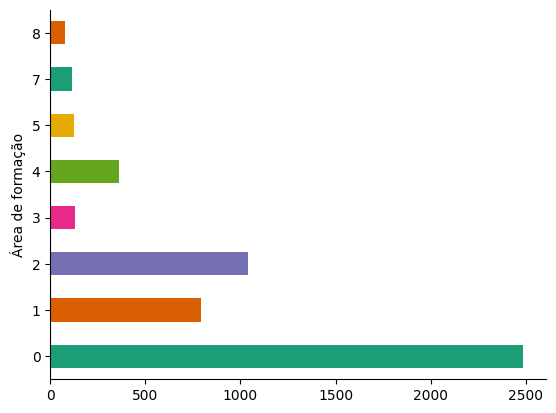

In [131]:
# @title Área de formação

from matplotlib import pyplot as plt
import seaborn as sns
base_princ.groupby('Área de formação').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('area_formacao.png', bbox_inches='tight')

In [132]:
from google.colab import files
files.download('area_formacao.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

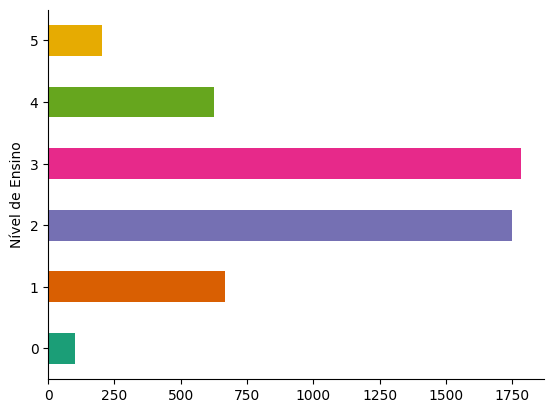

In [133]:
# @title Nível de Ensino

from matplotlib import pyplot as plt
import seaborn as sns
base_princ.groupby('Nível de Ensino').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('Nível de Ensino.png', bbox_inches='tight')


In [134]:
from google.colab import files
files.download('Nível de Ensino.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

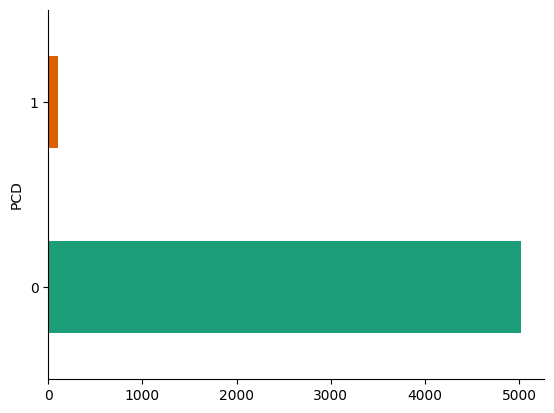

In [135]:
# @title PCD

from matplotlib import pyplot as plt
import seaborn as sns
base_princ.groupby('PCD').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('PCD.png', bbox_inches='tight')

In [136]:
from google.colab import files
files.download('PCD.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

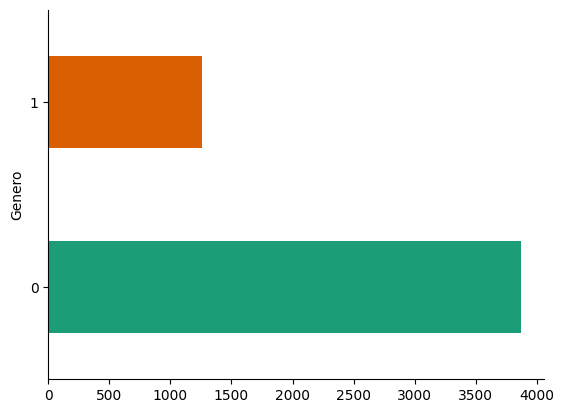

In [137]:
# @title Genero

from matplotlib import pyplot as plt
import seaborn as sns
base_princ.groupby('Genero').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('GENERO.png', bbox_inches='tight')

In [138]:
from google.colab import files
files.download('GENERO.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

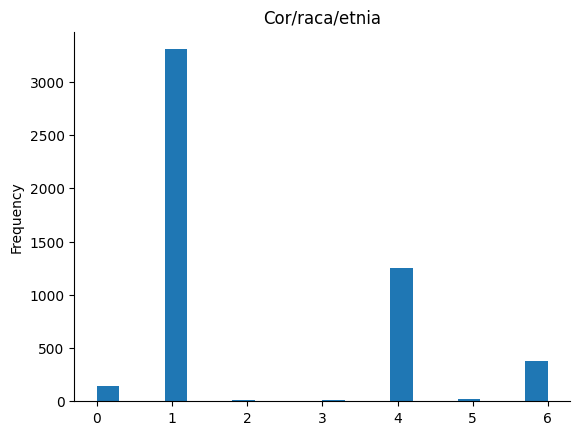

In [139]:
# @title Cor/raca/etnia

from matplotlib import pyplot as plt
base_princ['Cor/raca/etnia'].plot(kind='hist', bins=20, title='Cor/raca/etnia')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('CORRAÇAETNIA.png', bbox_inches='tight')

In [140]:
from google.colab import files
files.download('CORRAÇAETNIA.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

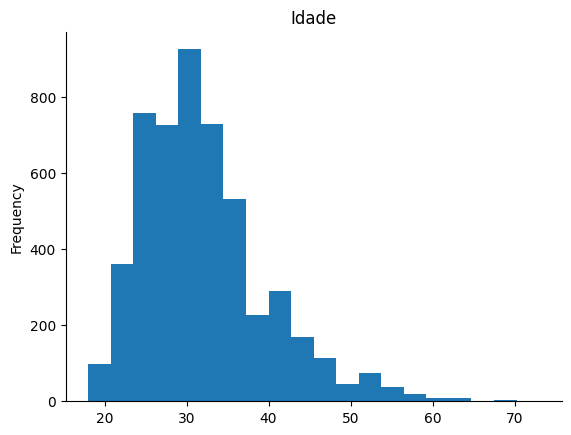

In [141]:
# @title Idade

from matplotlib import pyplot as plt
base_princ['Idade'].plot(kind='hist', bins=20, title='Idade')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('IDADE.png', bbox_inches='tight')

In [142]:
from google.colab import files
files.download('IDADE.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
base_princ.to_csv('base_princ_modificado.csv', index=False)


In [144]:
from google.colab import files
files.download('base_princ_modificado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>